In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('bank.csv', sep=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   str  
 2   marital    4521 non-null   str  
 3   education  4521 non-null   str  
 4   default    4521 non-null   str  
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   str  
 7   loan       4521 non-null   str  
 8   contact    4521 non-null   str  
 9   day        4521 non-null   int64
 10  month      4521 non-null   str  
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   str  
 16  y          4521 non-null   str  
dtypes: int64(7), str(10)
memory usage: 600.6 KB


In [3]:
#removing unnecessary variables 
df = df.drop(['job', 'day', 'month', 'contact'], axis=1)

In [4]:
df['marital'].value_counts() #change to numerical values 

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [5]:
df['education'].value_counts() #change to numerical values 

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [6]:
#changing categorical variables to numerical values
df['marital'] = (
    df['marital']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'single': 0, 'married': 1, 'divorced': 2})
)

df['education'] = (
    df['education']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})
)

df['default'] = (
    df['default']
    .astype(str) #ensure string
    .str.strip() # remove spaces 
    .str.lower() # make lowecase
    .map({'no': 0, 'yes': 1}))

df['housing'] = (
    df['housing']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'no': 0, 'yes': 1})
)

df['loan'] = (
    df['loan']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'no': 0, 'yes': 1})
)

df['poutcome'] = (
    df['poutcome']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'unknown': 0, 'other': 1, 'failure': 2, 'success': 3})
)

df['y'] = (
    df['y']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'no': 0, 'yes': 1})
)


In [7]:
df.head(20)

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,1,1,0,1787,0,0,79,1,-1,0,0,0
1,33,1,2,0,4789,1,1,220,1,339,4,2,0
2,35,0,3,0,1350,1,0,185,1,330,1,2,0
3,30,1,3,0,1476,1,1,199,4,-1,0,0,0
4,59,1,2,0,0,1,0,226,1,-1,0,0,0
5,35,0,3,0,747,0,0,141,2,176,3,2,0
6,36,1,3,0,307,1,0,341,1,330,2,1,0
7,39,1,2,0,147,1,0,151,2,-1,0,0,0
8,41,1,3,0,221,1,0,57,2,-1,0,0,0
9,43,1,1,0,-88,1,1,313,1,147,2,2,0


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   marital    4521 non-null   int64
 2   education  4521 non-null   int64
 3   default    4521 non-null   int64
 4   balance    4521 non-null   int64
 5   housing    4521 non-null   int64
 6   loan       4521 non-null   int64
 7   duration   4521 non-null   int64
 8   campaign   4521 non-null   int64
 9   pdays      4521 non-null   int64
 10  previous   4521 non-null   int64
 11  poutcome   4521 non-null   int64
 12  y          4521 non-null   int64
dtypes: int64(13)
memory usage: 459.3 KB


In [9]:
#implementing random forest classifier
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#import warnings warnings.filterwarnings('ignore')

X = df[['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
y = df['y'] #target variable

#spliting into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #creates 100 decision trees 
rf_classifier.fit(X_train, y_train) #train the model 

y_pred = rf_classifier.predict(X_test) #make predictions on the test set

accuracy = accuracy_score(y_test, y_pred) 
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'\nClassification Report:\n{classification_rep}')

sample = X_test.iloc[0:5] #taking first 5 rows of the test set as sample input
predictions = rf_classifier.predict(sample) #predicting the target variable for the sample input

sample_dict = sample.iloc[0].to_dict()
print(f'\nSample Input:\n{sample_dict}')
print(f'Predicted subscription (y): {predictions[0]}')


Accuracy: 0.8950

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.53      0.28      0.36        98

    accuracy                           0.90       905
   macro avg       0.72      0.62      0.65       905
weighted avg       0.87      0.90      0.88       905


Sample Input:
{'age': 51, 'marital': 1, 'education': 2, 'default': 1, 'balance': -2082, 'housing': 0, 'loan': 1, 'duration': 123, 'campaign': 6, 'pdays': -1, 'previous': 0, 'poutcome': 0}
Predicted subscription (y): 0


feature: age, score: 0.0002
feature: marital, score: 0.0046
feature: education, score: -0.0062
feature: default, score: 0.0002
feature: balance, score: -0.0029
feature: housing, score: -0.0024
feature: loan, score: -0.0018
feature: duration, score: 0.0393
feature: campaign, score: -0.0004
feature: pdays, score: -0.0007
feature: previous, score: 0.0069
feature: poutcome, score: 0.0077


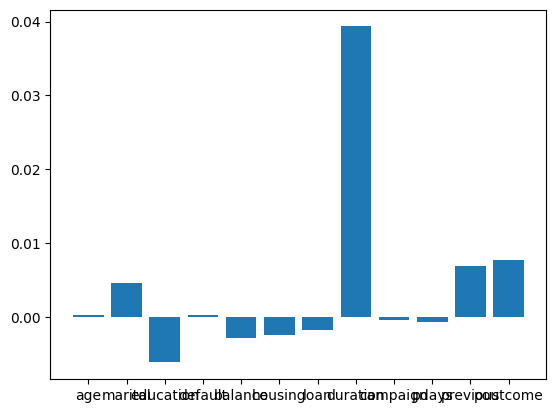

In [10]:
#permutation feature importance 
from sklearn.inspection import permutation_importance

results = permutation_importance(rf_classifier, X_test, y_test, scoring='accuracy')
for i, v in enumerate(results.importances_mean): 
    print(f'feature: {X.columns[i]}, score: {v:.4f}')

#visualize feature importance
plt.bar([X.columns[i] for i in range(len(results.importances_mean))], results.importances_mean)
plt.show()

In [11]:
#implementing binomial logistic regression
from sklearn.linear_model import LogisticRegression

X = X = df[['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
y = df['y'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test))
print(f'Logistic Regression Accuracy: {acc:.4f}')

class_rep = classification_report(y_test, clf.predict(X_test))
print(f'\nClassification Report:\n{class_rep}')

sample = X_test.iloc[0:5] #taking first 5 rows of the test set as sample input
predictions = clf.predict(sample) #predicting the target variable for the sample input

sample_dict = sample.iloc[0].to_dict()
print(f'\nSample Input:\n{sample_dict}')
print(f'Predicted subscription (y): {predictions[0]}')

Logistic Regression Accuracy: 0.8939

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.52      0.22      0.31        98

    accuracy                           0.89       905
   macro avg       0.72      0.60      0.63       905
weighted avg       0.87      0.89      0.87       905


Sample Input:
{'age': 51, 'marital': 1, 'education': 2, 'default': 1, 'balance': -2082, 'housing': 0, 'loan': 1, 'duration': 123, 'campaign': 6, 'pdays': -1, 'previous': 0, 'poutcome': 0}
Predicted subscription (y): 0


feature: age, score: -0.0002
feature: marital, score: -0.0004
feature: education, score: 0.0000
feature: default, score: 0.0000
feature: balance, score: 0.0000
feature: housing, score: -0.0029
feature: loan, score: -0.0018
feature: duration, score: 0.0285
feature: campaign, score: 0.0000
feature: pdays, score: 0.0013
feature: previous, score: 0.0000
feature: poutcome, score: 0.0093


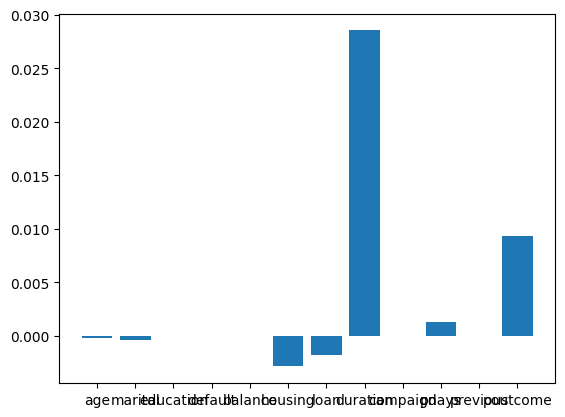

In [12]:
#permutation feature importance 
results = permutation_importance(clf, X_test, y_test, scoring='accuracy')
for i, v in enumerate(results.importances_mean): 
    print(f'feature: {X.columns[i]}, score: {v:.4f}')

#visualize feature importance
plt.bar([X.columns[i] for i in range(len(results.importances_mean))], results.importances_mean)
plt.show()